In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
!curl -O https://archive.ics.uci.edu/static/public/908/realwaste.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 12213    0 12213    0     0   5233      0 --:--:--  0:00:02 --:--:--  5239
100  171k    0  171k    0     0  57680      0 --:--:--  0:00:03 --:--:-- 57722
100  835k    0  835k    0     0   206k      0 --:--:--  0:00:04 --:--:--  206k
100 1859k    0 1859k    0     0   363k      0 --:--:--  0:00:05 --:--:--  367k
100 2571k    0 2571k    0     0   424k      0 --:--:--  0:00:06 --:--:--  582k
100 2875k    0 2875k    0     0   407k      0 --:--:--  0:00:07 --:--:--  606k
100 3179k    0 3179k    0     0   379k      0 --:--:--  0:00:08 --:--:--  565k
100 3759k    0 3759k    0     0   413k      0 --:--

In [51]:
image_size = (128,128)
batch_size = 128

In [2]:
import splitfolders
splitfolders.ratio("C:\\Users\\User\\Desktop\\New folder\\CNN-Project\\RealWaste", output="output", seed=1337, ratio=(.6, .2, .2))

In [66]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\User\\Desktop\\New folder\\CNN-Project\\output\\train",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\User\\Desktop\\New folder\\CNN-Project\\output\\test",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\User\\Desktop\\New folder\\CNN-Project\\output\\val",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2848 files belonging to 9 classes.
Found 955 files belonging to 9 classes.
Found 949 files belonging to 9 classes.


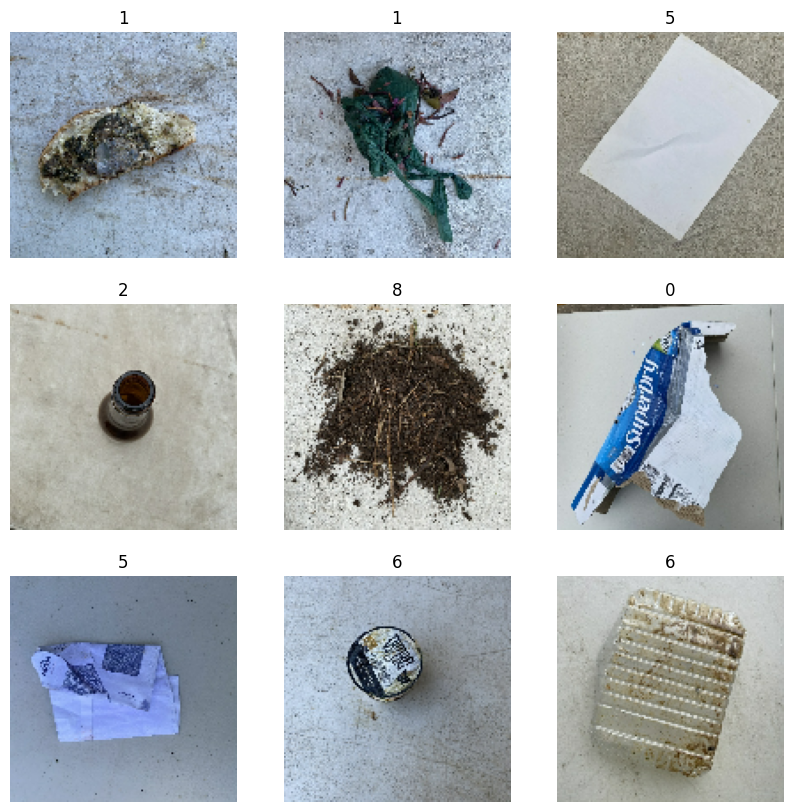

In [67]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [74]:
from keras import layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [75]:
#Apply data augmentation
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.experimental.AUTOTUNE if hasattr(tf.data.experimental, "AUTOTUNE") else 1
)

#Prefetching with buffer size of 1 if AUTOTUNE is unavailable
train_ds = train_ds.prefetch(1)
val_ds = val_ds.prefetch(1)

In [76]:
# To retrieve images and labels from the training, validation, and test sets

# Training set
train_images, train_labels = [], []
for images, labels in train_ds:
    train_images.extend(images.numpy())  # Convert tensor to numpy and add to list
    train_labels.extend(labels.numpy())

# Validation set
val_images, val_labels = [], []
for images, labels in val_ds:
    val_images.extend(images.numpy())
    val_labels.extend(labels.numpy())

# Testing set
test_images, test_labels = [], []
for images, labels in test_ds:
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

# Convert lists to numpy arrays
train_images, train_labels = np.array(train_images), np.array(train_labels)
val_images, val_labels = np.array(val_images), np.array(val_labels)
test_images, test_labels = np.array(test_images), np.array(test_labels)

# Display shapes to confirm
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (2848, 128, 128, 3)
Train labels shape: (2848,)
Validation images shape: (949, 128, 128, 3)
Validation labels shape: (949,)
Test images shape: (955, 128, 128, 3)
Test labels shape: (955,)


In [77]:
train_images , val_images, test_images = train_images/255.0 , val_images/255.0 , test_images/255.0

In [78]:
train_images[0]

array([[[0.57461786, 0.6303524 , 0.69543433],
        [0.57131964, 0.6311085 , 0.69483906],
        [0.57287943, 0.6326166 , 0.69636434],
        ...,
        [0.6318091 , 0.7138955 , 0.81977236],
        [0.6117866 , 0.69404954, 0.7999319 ],
        [0.62228584, 0.70442146, 0.8103038 ]],

       [[0.5707774 , 0.62175786, 0.68842447],
        [0.57666564, 0.62802124, 0.69456285],
        [0.5778545 , 0.6325739 , 0.6979943 ],
        ...,
        [0.6259645 , 0.70706284, 0.8129452 ],
        [0.6378144 , 0.71915734, 0.82503974],
        [0.632822  , 0.71338606, 0.81926847]],

       [[0.58204997, 0.63303035, 0.699697  ],
        [0.5757352 , 0.6267156 , 0.6933823 ],
        [0.5708813 , 0.6242823 , 0.6901421 ],
        ...,
        [0.6366111 , 0.7168238 , 0.82270616],
        [0.6329957 , 0.7114271 , 0.81702894],
        [0.635797  , 0.7142284 , 0.8192355 ]],

       ...,

       [[0.6597125 , 0.7136981 , 0.78424513],
        [0.65394795, 0.70608103, 0.77404636],
        [0.67508495, 0

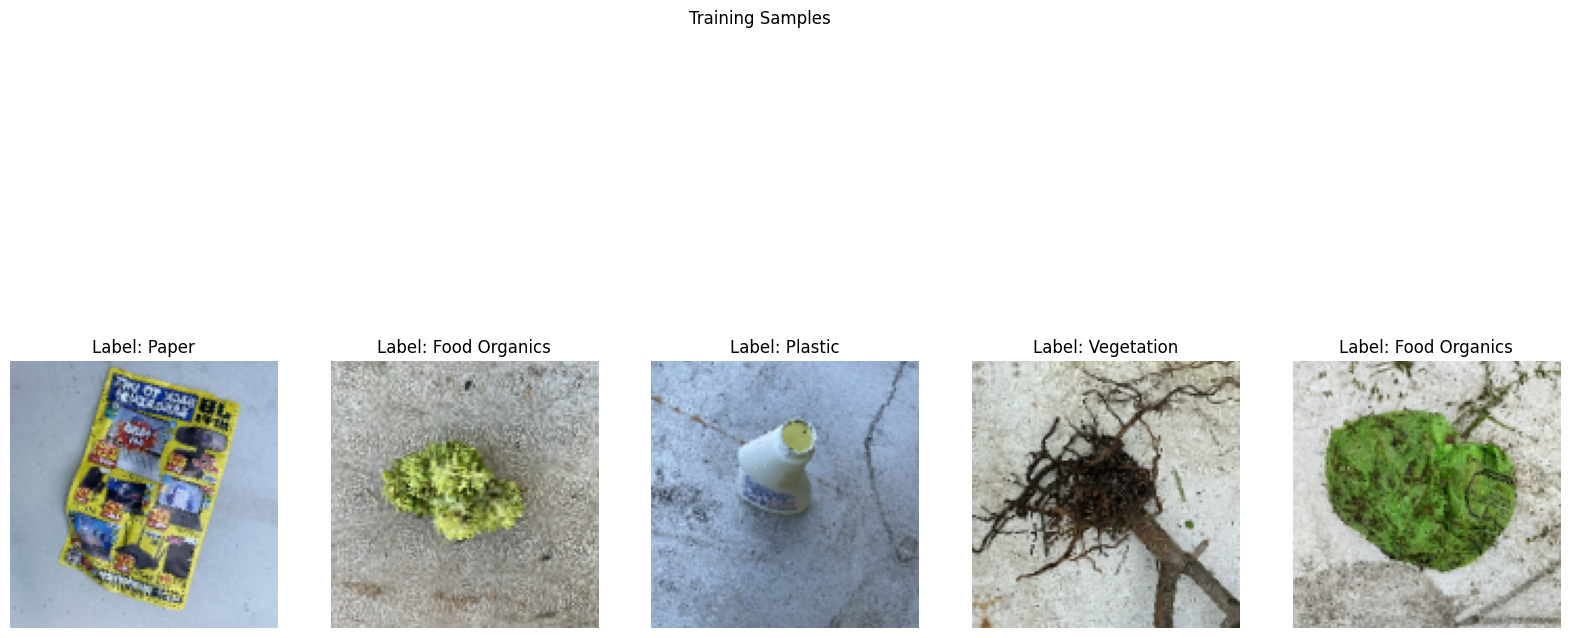

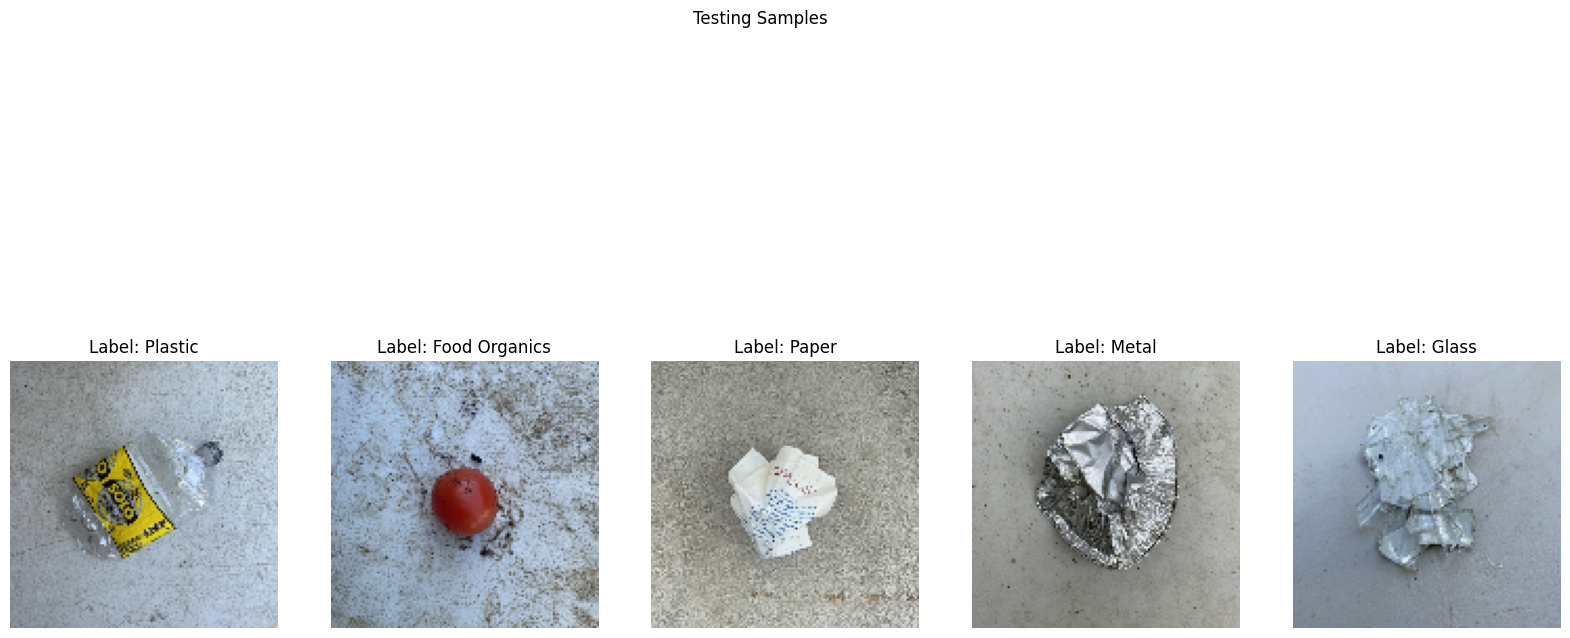

In [79]:
# Define a function to plot samples with labels
def plot_samples(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {class_names[labels[i]]}")
        plt.axis('off')

# Define class names for MNIST (digits 0-9)
class_names = ["Cardboard", "Food Organics", "Glass", "Metal", "Miscellaneous Trash", "Paper","Plastic","Textile Trash","Vegetation"]

# Plot a few training samples
plot_samples(train_images, train_labels, class_names, num_samples=5)
plt.suptitle('Training Samples')
plt.show()

# Plot a few testing samples
plot_samples(test_images, test_labels, class_names, num_samples=5)
plt.suptitle('Testing Samples')
plt.show()

In [106]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), strides=1, activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # Set NUM_CLASSES to your number of waste categories
])



learning_rate=0.001

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.0)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_107 (Conv2D)             │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 512)            │    14,746,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,843,977 (56.63 MB)

 Trainable params: 14,843,977 (56.63 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
training_history = model.fit(train_images, train_labels, epochs=15, validation_split=0.1)

Epoch 1/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.2180 - loss: 2.1603 - val_accuracy: 0.3789 - val_loss: 1.7907
Epoch 2/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - accuracy: 0.3692 - loss: 1.7504 - val_accuracy: 0.4842 - val_loss: 1.5102
Epoch 3/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 215ms/step - accuracy: 0.4466 - loss: 1.5298 - val_accuracy: 0.5088 - val_loss: 1.3320
Epoch 4/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 217ms/step - accuracy: 0.5204 - loss: 1.3449 - val_accuracy: 0.4982 - val_loss: 1.3863
Epoch 5/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 221ms/step - accuracy: 0.5538 - loss: 1.2299 - val_accuracy: 0.4316 - val_loss: 1.5601
Epoch 6/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 221ms/step - accuracy: 0.5749 - loss: 1.1562 - val_accuracy: 0.5614 - val_loss: 1.2507
Epoch 7/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 221ms/step - accuracy: 0.6763 - loss: 0.8991 - val_accuracy: 0.6000 - val_loss: 1.2089
Epoch 8/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 224ms/step - accuracy: 0.7366 - loss: 0.7392 - val_accu

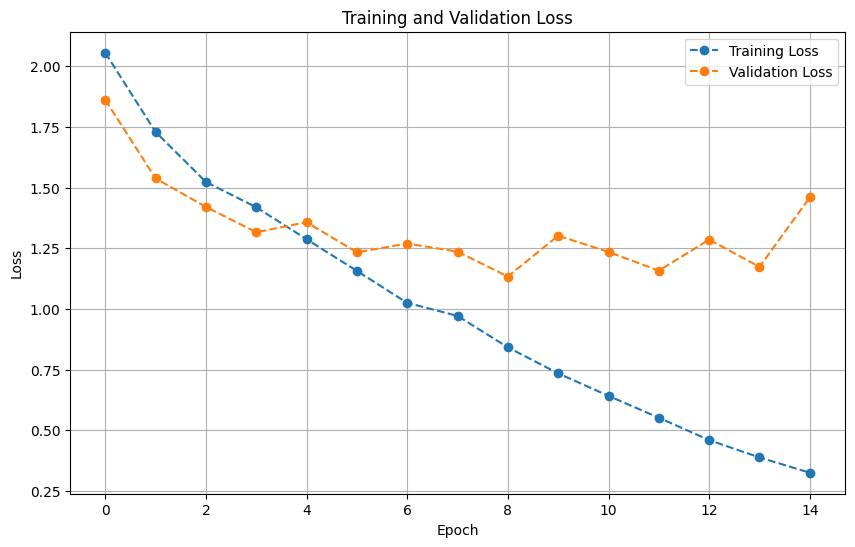

In [104]:
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(training_history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(training_history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [108]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4811 - loss: 3.2840
Test Loss: 3.5549509525299072
Test Accuracy: 0.48062828183174133
